## Microsoft製のオープンソースの統計的因果推論のパッケージ

https://github.com/Microsoft/dowhy#sample-causal-inference-analysis-in-dowhy

In [1]:
# pip install dowhy

     |████████████████████████████████| 97 kB 2.0 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import logging

import dowhy
from dowhy import CausalModel
import dowhy.datasets

In [7]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5, 
        num_instruments = 2,
        num_treatments=1,
        num_samples=10000,
        treatment_is_binary=True,
        outcome_is_binary=False)
df = data["df"]
df

,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,1.0,0.568257,2.364327,0.340776,-1.085089,-0.728332,1.130325,True,21.221158
1,1.0,0.553410,1.329025,-0.705964,-0.762967,0.604483,0.498310,True,13.837676
2,1.0,0.935963,1.521403,-0.203500,-0.307679,0.332065,0.657882,True,17.889136
3,1.0,0.586518,1.353724,0.082542,-1.741458,2.277628,-2.329412,True,7.862703
4,1.0,0.109410,0.112294,1.046211,-1.283567,-0.282282,2.131377,True,20.170387
...,...,...,...,...,...,...,...,...,...
9995,1.0,0.738864,-0.159912,-0.230145,0.474671,1.834301,-0.254512,True,12.873064
9996,1.0,0.484274,-0.581245,-0.221582,-1.652722,2.183223,-1.189933,True,3.419320
9997,1.0,0.728395,1.008791,-0.858791,-1.283863,0.375959,1.109952,True,12.607558
9998,1.0,0.419363,1.943529,0.992158,-0.774849,1.251885,-0.436988,True,21.684429


In [14]:
data

{'df':        Z0        Z1        W0        W1        W2        W3        W4    v0  \
 0     1.0  0.568257  2.364327  0.340776 -1.085089 -0.728332  1.130325  True   
 1     1.0  0.553410  1.329025 -0.705964 -0.762967  0.604483  0.498310  True   
 2     1.0  0.935963  1.521403 -0.203500 -0.307679  0.332065  0.657882  True   
 3     1.0  0.586518  1.353724  0.082542 -1.741458  2.277628 -2.329412  True   
 4     1.0  0.109410  0.112294  1.046211 -1.283567 -0.282282  2.131377  True   
 ...   ...       ...       ...       ...       ...       ...       ...   ...   
 9995  1.0  0.738864 -0.159912 -0.230145  0.474671  1.834301 -0.254512  True   
 9996  1.0  0.484274 -0.581245 -0.221582 -1.652722  2.183223 -1.189933  True   
 9997  1.0  0.728395  1.008791 -0.858791 -1.283863  0.375959  1.109952  True   
 9998  1.0  0.419363  1.943529  0.992158 -0.774849  1.251885 -0.436988  True   
 9999  1.0  0.805409  0.774927 -0.451527  0.785501 -2.754442 -3.146748  True   
 
               y  propensity_sco

In [8]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"],
        instruments=data["instrument_names"],
        logging_level = logging.INFO
        )

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']


INFO:dowhy.causal_graph:Using Matplotlib for plotting


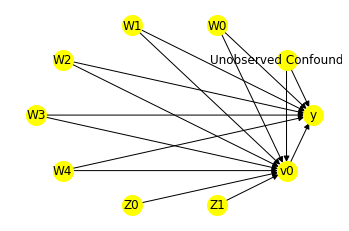

In [9]:
model.view_model()

In [15]:
# from IPython.display import Image, display
# display(Image(filename="causal_model.png"))

In [11]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W2', 'W4', 'W0', 'W1', 'W3', 'Unobserved Confounders']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['Z1', 'Z0']


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W2,W4,W0,W1,W3))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W2,W4,W0,W1,W3,U) = P(y|v0,W2,W4,W0,W1,W3)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)



## Method1 : Regression

In [12]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: y~v0+W2+W4+W0+W1+W3


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.608e+29
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:43:13   Log-Likelihood:             2.6811e+05
No. Observations:               10000   AIC:                        -5.362e+05
Df Residuals:                    9993   BIC:                        -5.362e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.26e-13   6.15e-14     -5.299      0.0

## Method2 : Stratification

In [13]:
causal_estimate_strat = model.estimate_effect(identified_estimand,
                                              method_name="backdoor.propensity_score_stratification",
                                              target_units="att")
print(causal_estimate_strat)
print("Causal Estimate is " + str(causal_estimate_strat.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W2+W4+W0+W1+W3
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
INFO:numexpr.utils:NumExpr defaulting to 4 threads.


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W2,W4,W0,W1,W3))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W2,W4,W0,W1,W3,U) = P(y|v0,W2,W4,W0,W1,W3)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

## Realized estimand
b: y~v0+W2+W4+W0+W1+W3
Target units: att

## Estimate
Mean value: 9.66123943013791

Causal Estimate is 9.66123943013791
